In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid")


# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

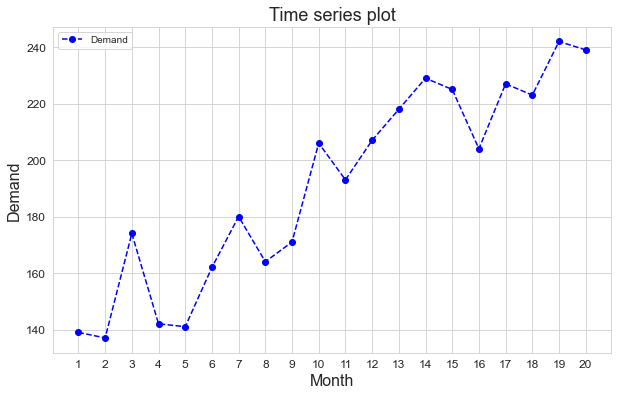

In [2]:
data = pd.read_excel('data/Time_series.xlsx')
# data.head()
fig, ax = plt.subplots(figsize = (10, 6))
labels = data['Month']
plt.plot(data['Month'], data['Demand'], 'bo--', label= 'Demand')
plt.xticks(data['Month'], labels)
plt.title('Time series plot', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.legend()
# save_fig('Figure1_TimeSeries')
plt.show()

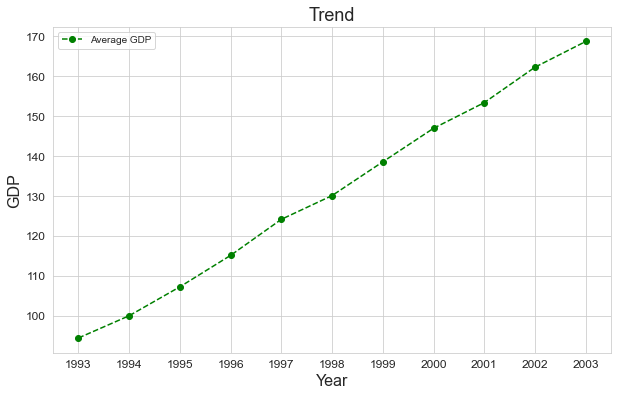

In [3]:
Year =     [1993,
            1994,
            1995,
            1996,
            1997,
            1998,
            1999,
            2000,
            2001,
            2002,
            2003]
GDP =  [94.43,
        100.00,
        107.25,
        115.13,
        124.16,
        130.11,
        138.57,
        146.97,
        153.40,
        162.28,
        168.73]
data = pd.DataFrame(list(zip(Year, GDP)), columns = ['Year', 'GDP'])

fig, ax = plt.subplots(figsize = (10, 6))
labels = data['Year']
plt.plot(data['Year'], data['GDP'], 'go--', label= 'Average GDP')
plt.xticks(data['Year'], labels)
plt.title('Trend', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('GDP', fontsize=16)
plt.legend()
# save_fig('Figure2_Trend')
plt.show()


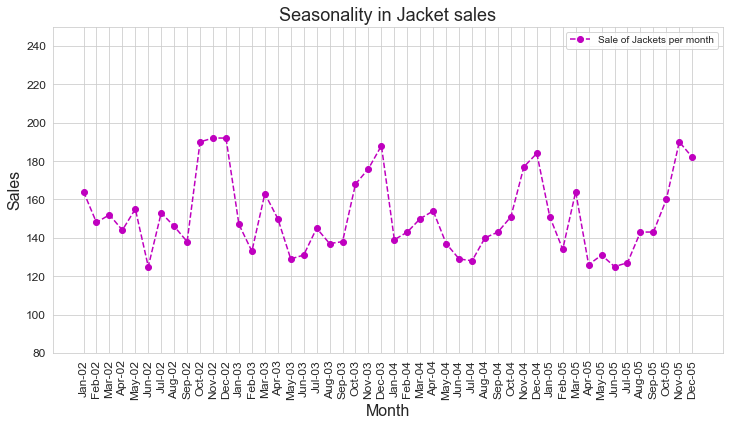

In [4]:
data = pd.read_csv('data/Branded_Jackets.csv')
data['MA'] = data.Sales.rolling(window=5).mean()
# data.head()
fig, ax = plt.subplots(figsize = (12, 6))
labels = data['Month']
plt.plot(data['Month'], data['Sales'], 'mo--', label= 'Sale of Jackets per month')
plt.xticks(data['Month'], labels, rotation = 90)
plt.title('Seasonality in Jacket sales', fontsize=18)
plt.ylim((80, 250)) 
plt.xlabel('Month', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend()
# save_fig('Figure3_Seasonality')
plt.show()

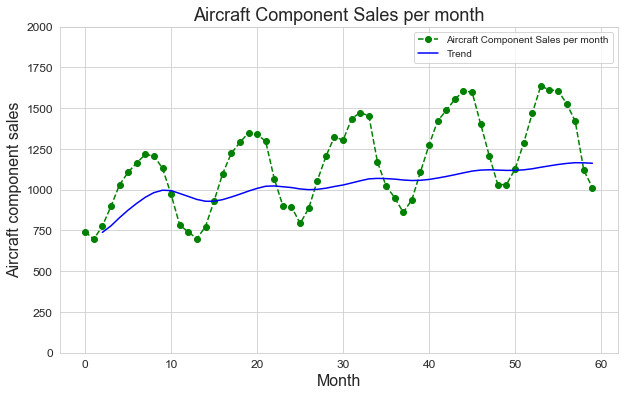

In [5]:
data = pd.read_csv('data/Aircraft_Component.csv')
data['MA'] = data.Sales.expanding(min_periods=3).mean()
# data.head()
fig, ax = plt.subplots(figsize = (10, 6))
# labels = data['Month']
plt.plot(data['Sales'], 'go--', label= 'Aircraft Component Sales per month')
plt.plot(data['MA'], 'b-', label= 'Trend')
# plt.xticks(data['Month'], labels, rotation = 90)
plt.title('Aircraft Component Sales per month', fontsize=18)
plt.ylim((0, 2000)) 
plt.xlabel('Month', fontsize=16)
plt.ylabel('Aircraft component sales', fontsize=16)
plt.legend()
# save_fig('Figure4_Trend_Seasonality')
plt.show()

In [6]:
data = pd.read_csv('data/shampoo-sales.csv', names = ['month', 'sales'], header = None)
data.head()

,month,sales
0,01-Jan,266.0
1,01-Feb,145.9
2,01-Mar,183.1
3,01-Apr,119.3
4,01-May,180.3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   36 non-null     object 
 1   sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [8]:
import datetime as dt
data['month'] = data['month'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%d-%b'))
data.head()

,month,sales
0,1900-01-01,266.0
1,1900-02-01,145.9
2,1900-03-01,183.1
3,1900-04-01,119.3
4,1900-05-01,180.3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   36 non-null     datetime64[ns]
 1   sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


### Introduction to <code>datetime</code>

In [10]:
from datetime import datetime

# get current date
datetime_object = datetime.now()
print(datetime_object)
print('Type :- ',type(datetime_object))

2021-03-28 19:20:47.023019
Type :-  <class 'datetime.datetime'>


In [11]:
my_string = '2019-10-31'

# Create date object in given time format yyyy-mm-dd
my_date = datetime.strptime(my_string, "%Y-%m-%d")

print(my_date)
print('Type: ',type(my_date))

2019-10-31 00:00:00
Type:  <class 'datetime.datetime'>


In [12]:
print('Month: ', my_date.month) # To Get month from date
print('Year: ', my_date.year) # To Get month from year

Month:  10
Year:  2019


In [13]:
# import calendar module
import calendar
print('Day of Month:', my_date.day)

# to get name of day(in number) from date
print('Day of Week (number): ', my_date.weekday())

# to get name of day from date
print('Day of Week (name): ', calendar.day_name[my_date.weekday()])

Day of Month: 31
Day of Week (number):  3
Day of Week (name):  Thursday


In [14]:
data = pd.read_csv('data/Strength.csv')
data = data[['Weeks', 'Strength']]
data['Weeks'] = data['Weeks'].apply(lambda x: x - 19)
data.head()

,Weeks,Strength
0,1,34
1,2,35
2,3,33
3,4,36
4,5,35


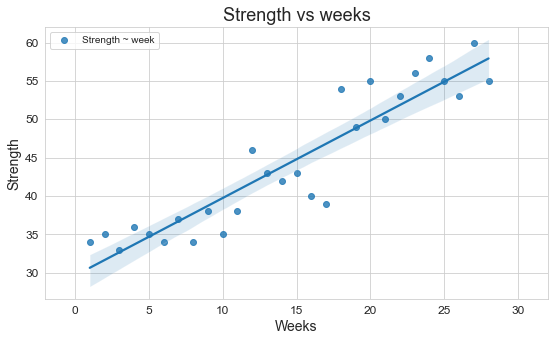

In [15]:
fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.regplot(x=data['Weeks'], y = data['Strength'], label = 'Strength ~ week')
ax.set_title('Strength vs weeks')
ax.title.set_size(18)
ax.set_xlim(-2, 32)
plt.legend()
# save_fig('Figure5_Strength_Week')
plt.show()

In [16]:
data.corr()

,Weeks,Strength
Weeks,1.000000,0.925045
Strength,0.925045,1.000000


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

linear_regression = smf.ols(formula='Strength ~ Weeks', data=data)
fitted_model = linear_regression.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.96e-12
Time:                        19:20:53   Log-Likelihood:                -73.594
No. Observations:                  28   AIC:                             151.2
Df Residuals:                      26   BIC:                             153.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6349      1.351     21.942      0.000      26.859      32.411
Weeks          1.0104      0.081     12.417      0.000       0.843       1.178
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.492
Skew:                          -0.237   Prob(JB):                        0.782
Kurtosis:                       2.555   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(fitted_model)

anova_results

,df,sum_sq,mean_sq,F,PR(>F)
Weeks,1.0,1865.197592,1865.197592,154.189391,1.957535e-12
Residual,26.0,314.516694,12.096796,NaN,NaN


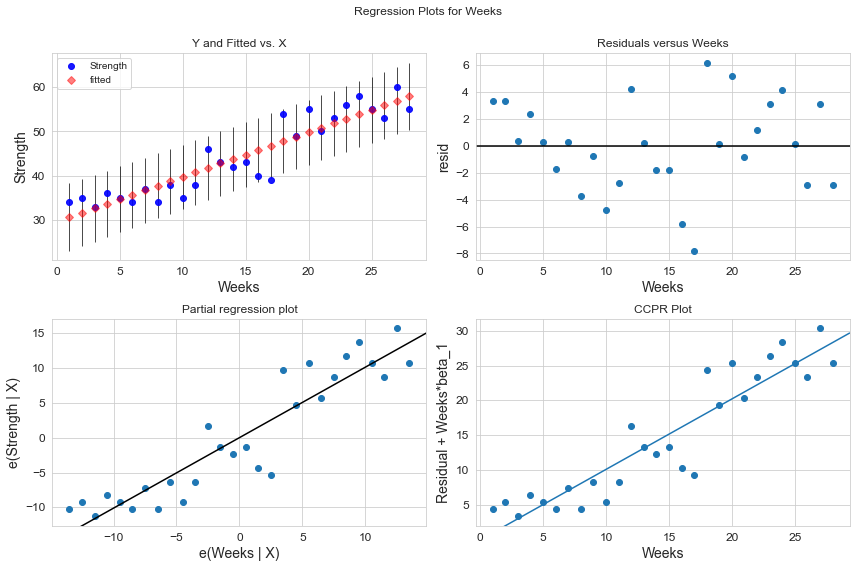

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fitted_model, 'Weeks', fig=fig)
# save_fig('Figure6_Residuals')
plt.show()

In [20]:
pred_val = fitted_model.fittedvalues.copy()
true_val = data['Strength'].values.copy()
residual = true_val - pred_val
data['Residuals'] = residual
data.head(10)

,Weeks,Strength,Residuals
0,1,34,3.354680
1,2,35,3.344280
2,3,33,0.333881
3,4,36,2.323481
4,5,35,0.313082
5,6,34,-1.697318
6,7,37,0.292282
7,8,34,-3.718117
8,9,38,-0.728517
9,10,35,-4.738916


In [21]:
from scipy import stats

x = data['Residuals']
shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.980408251285553, pvalue=0.8600720763206482)

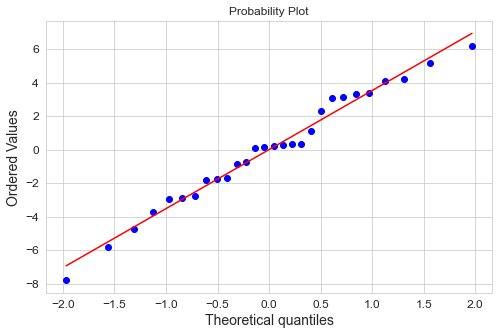

In [22]:
import scipy as sp
fig, ax = plt.subplots(figsize=(8, 5))
_, (__, ___, r) = sp.stats.probplot(x, plot=ax, fit=True)
# save_fig('Figure7_Residuals_Normality')

In [23]:
test = fitted_model.outlier_test(method='bonf', alpha=0.05)
print(test)

    student_resid   unadj_p   bonf(p)
0        1.038932  0.308781  1.000000
1        1.026797  0.314349  1.000000
2        0.099694  0.921383  1.000000
3        0.695633  0.493075  1.000000
4        0.092299  0.927196  1.000000
5       -0.500107  0.621373  1.000000
6        0.085302  0.932701  1.000000
7       -1.106688  0.278965  1.000000
8       -0.211170  0.834466  1.000000
9       -1.422795  0.167155  1.000000
10      -0.802240  0.429974  1.000000
11       1.257568  0.220169  1.000000
12       0.066050  0.947864  1.000000
13      -0.513930  0.611814  1.000000
14      -0.516963  0.609725  1.000000
15      -1.767769  0.089304  1.000000
16      -2.515017  0.018701  0.523629
17       1.904692  0.068387  1.000000
18       0.048368  0.961807  1.000000
19       1.564966  0.130162  1.000000
20      -0.248290  0.805938  1.000000
21       0.332305  0.742429  1.000000
22       0.932250  0.360124  1.000000
23       1.250429  0.222721  1.000000
24       0.031164  0.975386  1.000000
25      -0.8

In [28]:
data = pd.read_excel('data/Age_SBP.xlsx', header=None)
data.columns =['Age', 'SBP']
data.head()

,Age,SBP
0,76,150
1,77,155
2,68,168
3,49,142
4,80,170


Saving figure Figure8_Corr


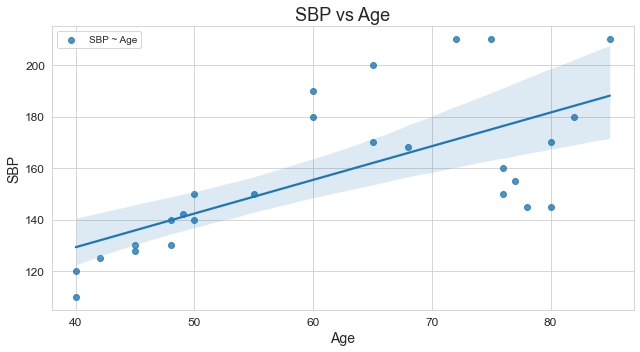

In [31]:
fig, ax = plt.subplots(figsize = (9, 5))
ax = sns.regplot(x=data['Age'], y = data['SBP'], label = 'SBP ~ Age')
ax.set_title('SBP vs Age')
ax.title.set_size(18)
ax.set_xlim(38, 87)
plt.legend()
# save_fig('Figure8_Corr')
plt.show()

In [32]:
data.corr()

,Age,SBP
Age,1.000000,0.676046
SBP,0.676046,1.000000


In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

linear_regression = smf.ols(formula='SBP ~ Age', data=data)
fitted_model = linear_regression.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     20.20
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           0.000150
Time:                        19:27:13   Log-Likelihood:                -115.98
No. Observations:                  26   AIC:                             236.0
Df Residuals:                      24   BIC:                             238.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.0474     18.511      4.162      0.000      38.842     115.253
Age            1.3065      0.291      4.495      0.000       0.707       1.906
==============================================================================
Omnibus:                        1.023   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.007
Skew:                           0.378   Prob(JB):                        0.604
Kurtosis:                       2.401   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(fitted_model)

anova_results

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,9601.452495,9601.452495,20.201981,0.00015
Residual,24.0,11406.547505,475.272813,NaN,NaN


Saving figure Figure9_Residuals


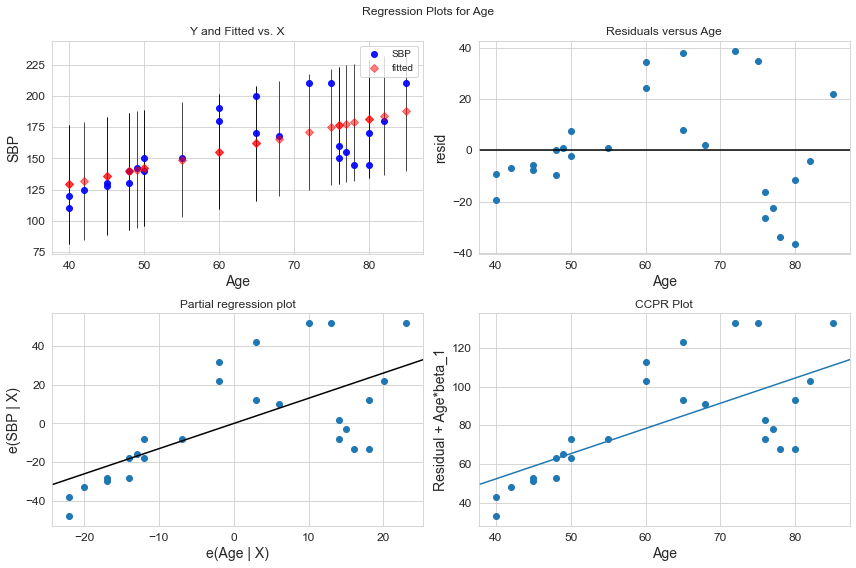

In [35]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fitted_model, 'Age', fig=fig)
# save_fig('Figure9_Residuals')
plt.show()

In [36]:
pred_val = fitted_model.fittedvalues.copy()
true_val = data['SBP'].values.copy()
residual = true_val - pred_val
data['Residuals'] = residual
data.head(10)

,Age,SBP,Residuals
0,76,150,-26.341219
1,77,155,-22.647717
2,68,168,2.110763
3,49,142,0.934222
4,80,170,-11.567211
5,60,190,34.562746
6,65,200,38.030257
7,85,210,21.900300
8,65,170,8.030257
9,55,150,1.095235


In [37]:
from scipy import stats

x = data['Residuals']
shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.9442487955093384, pvalue=0.16960354149341583)

Saving figure Figure10_Residuals_Normality


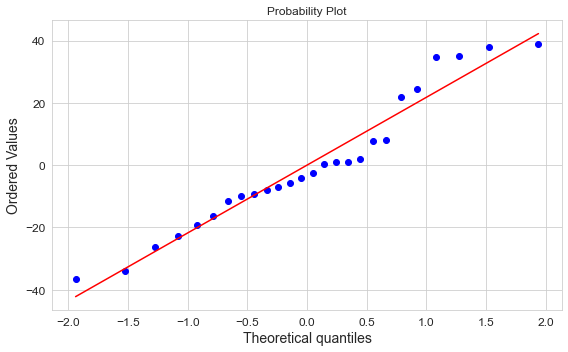

In [38]:
import scipy as sp
fig, ax = plt.subplots(figsize=(8, 5))
_, (__, ___, r) = sp.stats.probplot(x, plot=ax, fit=True)
# save_fig('Figure10_Residuals_Normality')

In [39]:
test = fitted_model.outlier_test(method='bonf', alpha=0.05)
print(test)

    student_resid   unadj_p  bonf(p)
0       -1.271294  0.216331      1.0
1       -1.086347  0.288580      1.0
2        0.097006  0.923562      1.0
3        0.043463  0.965707      1.0
4       -0.549974  0.587639      1.0
5        1.677359  0.107012      1.0
6        1.870971  0.074126      1.0
7        1.082619  0.290198      1.0
8        0.369136  0.715403      1.0
9        0.050384  0.960252      1.0
10      -0.772157  0.447884      1.0
11      -0.275286  0.785555      1.0
12      -0.448539  0.657961      1.0
13      -1.689166  0.104701      1.0
14      -0.110130  0.913262      1.0
15       1.157524  0.258938      1.0
16       0.011228  0.991139      1.0
17      -0.457253  0.651779      1.0
18      -0.199125  0.843915      1.0
19       0.354982  0.725837      1.0
20      -0.944203  0.354880      1.0
21      -1.851566  0.076970      1.0
22       1.729517  0.097117      1.0
23      -0.370055  0.714728      1.0
24       1.938824  0.064889      1.0
25      -0.330044  0.744354      1.0
